In [1]:
import numpy as np
from voronoi_bin import *
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.io.fits as fits

In [15]:
# Noisy gaussian
hdu = fits.open('elinecube_par_3C264.fits')
data = hdu[6].data
yp, xp = np.indices((np.shape(data)[1],np.shape(data)[0]))
#R = np.sqrt((xp-50)**2+(yp-50)**2)
sigma = 100
g = data
s = 1
noise = np.random.normal(size=data.shape)*s

In [51]:
pix_bin, bin_x, bin_y, bin_sn, bin_npix, scale = bin2d(xp.flatten(), yp.flatten(), (g+noise).flatten(), g.flatten()*0+s, 20., cvt=True, wvt=False, graphs=False, quiet=False)

Bin-accretion...
  bin: 1 / 1181
  bin: 2 / 1181
  bin: 3 / 1181
  bin: 4 / 1181
  bin: 5 / 1181
  bin: 6 / 1181
  bin: 7 / 1181
  bin: 8 / 1181
  bin: 9 / 1181
  bin: 10 / 1181
  bin: 11 / 1181
  bin: 12 / 1181
  bin: 13 / 1181
  bin: 14 / 1181
  bin: 15 / 1181
  bin: 16 / 1181
  bin: 17 / 1181
  bin: 18 / 1181
  bin: 19 / 1181
  bin: 20 / 1181
  bin: 21 / 1181
  bin: 22 / 1181
  bin: 23 / 1181
  bin: 24 / 1181
  bin: 25 / 1181
  bin: 26 / 1181
  bin: 27 / 1181
  bin: 28 / 1181
  bin: 29 / 1181
  bin: 30 / 1181
  bin: 31 / 1181
  bin: 32 / 1181
  bin: 33 / 1181
  bin: 34 / 1181
  bin: 35 / 1181
  bin: 36 / 1181
  bin: 37 / 1181
  bin: 38 / 1181
  bin: 39 / 1181
  bin: 40 / 1181
  bin: 41 / 1181
  bin: 42 / 1181
  bin: 43 / 1181
  bin: 44 / 1181
  bin: 45 / 1181
  bin: 46 / 1181
  bin: 47 / 1181
  bin: 48 / 1181
  bin: 49 / 1181
  bin: 50 / 1181
  bin: 51 / 1181
  bin: 52 / 1181
  bin: 53 / 1181
  bin: 54 / 1181
  bin: 55 / 1181
  bin: 56 / 1181
  bin: 57 / 1181
  bin: 58 / 1181
  bin:

In [48]:
# Bin stats
bad = bin_sn < 20
masked = pix_bin*1
mean_bins = pix_bin*0.
median_bins = pix_bin*0.

mea = bin_x*0.
med = bin_x*0.
bx = bin_x*0.
by = bin_y*0.

bin_ids = np.unique(pix_bin)


In [49]:
for i in range(len(bin_ids)):
    bin_mask = pix_bin == bin_ids[i]

    mea[i] = (g+noise).flatten()[bin_mask].mean()
    mean_bins[bin_mask] = mea[i]

    med[i] = np.median((g+noise).flatten()[bin_mask])
    median_bins[bin_mask] = med[i]

    bx[i] = np.sum(xp.flatten()*bin_mask)/bin_mask.sum()
    by[i] = np.sum(yp.flatten()*bin_mask)/bin_mask.sum()

for bin in np.where(bad)[0]:
    bin_mask = pix_bin == bin
    masked[bin_mask] = -99


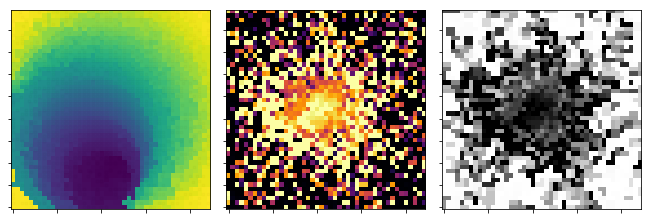

In [52]:
# Plot
plt.rcParams['image.origin'] = 'lower'

fig = plt.figure(figsize=[9, 2.8])
ax = fig.add_subplot(131)
ax.imshow(pix_bin.reshape(data.shape))
ax.scatter(bin_x, bin_y, marker='.', color='k', alpha=0.01)

ax = fig.add_subplot(132)
ax.imshow(g+noise, vmin=-0.1, vmax=100, cmap='inferno')

ax = fig.add_subplot(133)
ax.imshow(median_bins.reshape(data.shape), vmin=-0.1, vmax=100, cmap='gray_r')

for ax in fig.axes:
    ax.set_xticklabels([]); ax.set_yticklabels([])

fig.tight_layout(pad=0.1)